In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.datasets import CachedDatasets


In [3]:
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
df1 = df[['Date','Infections']]
df1.reset_index(drop=True)
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
l = df1['Date']
ts = df1['Inf_day']
data = ts.values
X = data.reshape(data.shape[0])
print(X)

            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

C:\Users\Alex\AppData\Local\Temp\ipykernel_95112\1742152928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [4]:
from keras.models import load_model

# Load the saved model from the file
model = load_model("my_gru_model.h5")

# Now you can use 'loaded_model' for predictions or further training


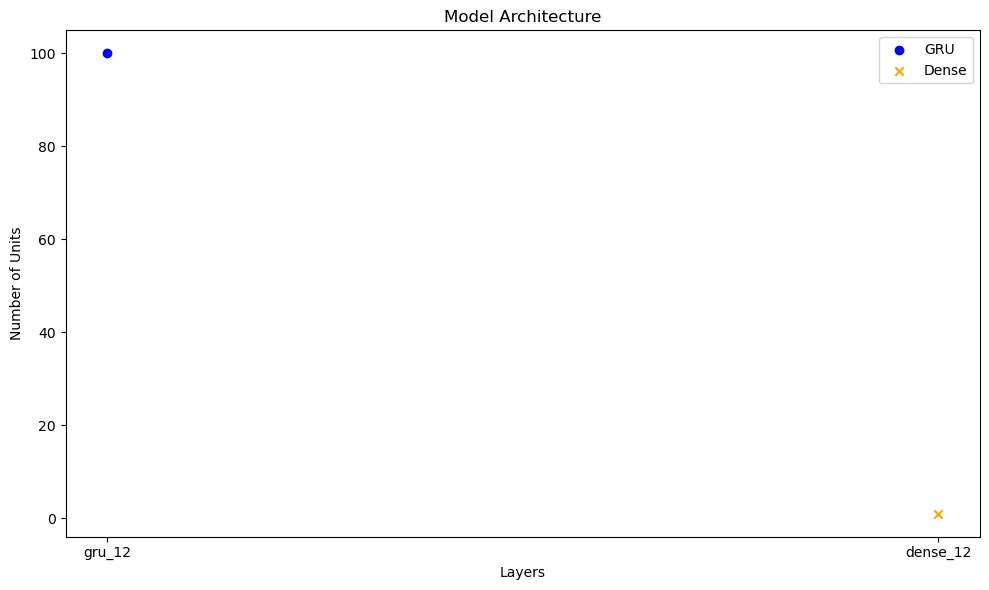

In [5]:

from keras.utils import plot_model
from keras.layers import GRU, Dense

# Plot the model architecture and save it to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Visualize the model architecture using Matplotlib
plt.figure(figsize=(10, 6))
plt.title("Model Architecture")
plt.xlabel("Layers")
plt.ylabel("Number of Units")

for layer in model.layers:
    if isinstance(layer, GRU):
        plt.scatter(layer.name, layer.units, color='blue', marker='o', label='GRU')
    elif isinstance(layer, Dense):
        plt.scatter(layer.name, layer.units, color='orange', marker='x', label='Dense')

plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Normalize the data
import matplotlib.pyplot as plt
# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform([X])

X_n = X_normalized[0]
                                    
print(X_n)

[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


In [7]:
# y_pred = model.predict(X_n.reshape(X_n.shape[0], X_n.shape[1], 1))
y_pred = model.predict(X_n)
# Print the predictions

print(y_pred)

36/36 [==============================] - 0s 846us/step
[[-0.7121207 ]
 [-0.75117373]
 [-0.7316561 ]
 ...
 [-0.60108835]
 [-0.67952263]
 [-0.5748815 ]]


In [8]:
mu = np.mean(X)
var = np.var(X)

# Inverse transform predictions to get them in their original scale
y_pred_original_scale = (y_pred * np.sqrt(var)) + mu

In [9]:
# Define the number of time steps to forecast ahead
L = 365

# Initialize the last sequence from the training data for forecasting
last_sequence = X_n[-1:]

# Make a prognosis for L time steps ahead
forecast = []


In [10]:

for _ in range(L):
    # Predict the next time step using the last sequence
    next_step_pred = model.predict(last_sequence)
    
    # Append the prediction to the forecast list
    forecast.append(next_step_pred)
    
    # Update the last sequence for the next prediction
    last_sequence = np.concatenate((last_sequence[:, 1:], next_step_pred), axis=1)


1/1 [==============================] - 0s 19ms/step


In [11]:

# Convert the forecast to the original scale
forecast_original_scale = (np.array(forecast) * np.sqrt(var)) + mu

# Print the forecasted values
print("Forecasted Values:", forecast_original_scale)


Forecasted Values: [[[26.92627 ]]

 [[26.853653]]

 [[26.782104]]

 [[26.711617]]

 [[26.642159]]

 [[26.573738]]

 [[26.50634 ]]

 [[26.439949]]

 [[26.37455 ]]

 [[26.310127]]

 [[26.246681]]

 [[26.184189]]

 [[26.122604]]

 [[26.061966]]

 [[26.002228]]

 [[25.943398]]

 [[25.885468]]

 [[25.8284  ]]

 [[25.772202]]

 [[25.716827]]

 [[25.662308]]

 [[25.608612]]

 [[25.555748]]

 [[25.50367 ]]

 [[25.452393]]

 [[25.401901]]

 [[25.352165]]

 [[25.3032  ]]

 [[25.25499 ]]

 [[25.207512]]

 [[25.160744]]

 [[25.114677]]

 [[25.069344]]

 [[25.024696]]

 [[24.98072 ]]

 [[24.937439]]

 [[24.894814]]

 [[24.852844]]

 [[24.811531]]

 [[24.770859]]

 [[24.73079 ]]

 [[24.69133 ]]

 [[24.652527]]

 [[24.614304]]

 [[24.576675]]

 [[24.539612]]

 [[24.503136]]

 [[24.467224]]

 [[24.43187 ]]

 [[24.397072]]

 [[24.362785]]

 [[24.32904 ]]

 [[24.295815]]

 [[24.263107]]

 [[24.230927]]

 [[24.199234]]

 [[24.168037]]

 [[24.137314]]

 [[24.107079]]

 [[24.077332]]

 [[24.04805 ]]

 [[24

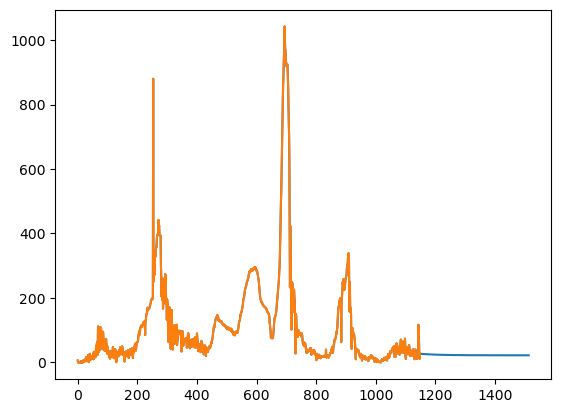

In [12]:
plt.plot(np.append(X.flatten(),forecast_original_scale.flatten()))
plt.plot(X, label='forecast')